In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [1]:
# Define the base folder and regions
base_folder = r'D:\File_auto\0_UCL_CASA\OneDrive - University College London\Xiaoyi_dissertation\Analysis\Data\dfl_traffic_count'
regions = ['Camden', 'City of London', 'Islington', 'Kensington and Chelsea', 'Lambeth', 'Southwark', 'Westminster']

# Define the vehicle types
vehicle_types = ['pedal_cycles', 'two_wheeled_motor_vehicles', 'cars_and_taxis', 'buses_and_coaches', 'lgvs', 'all_hgvs']

# boxplot

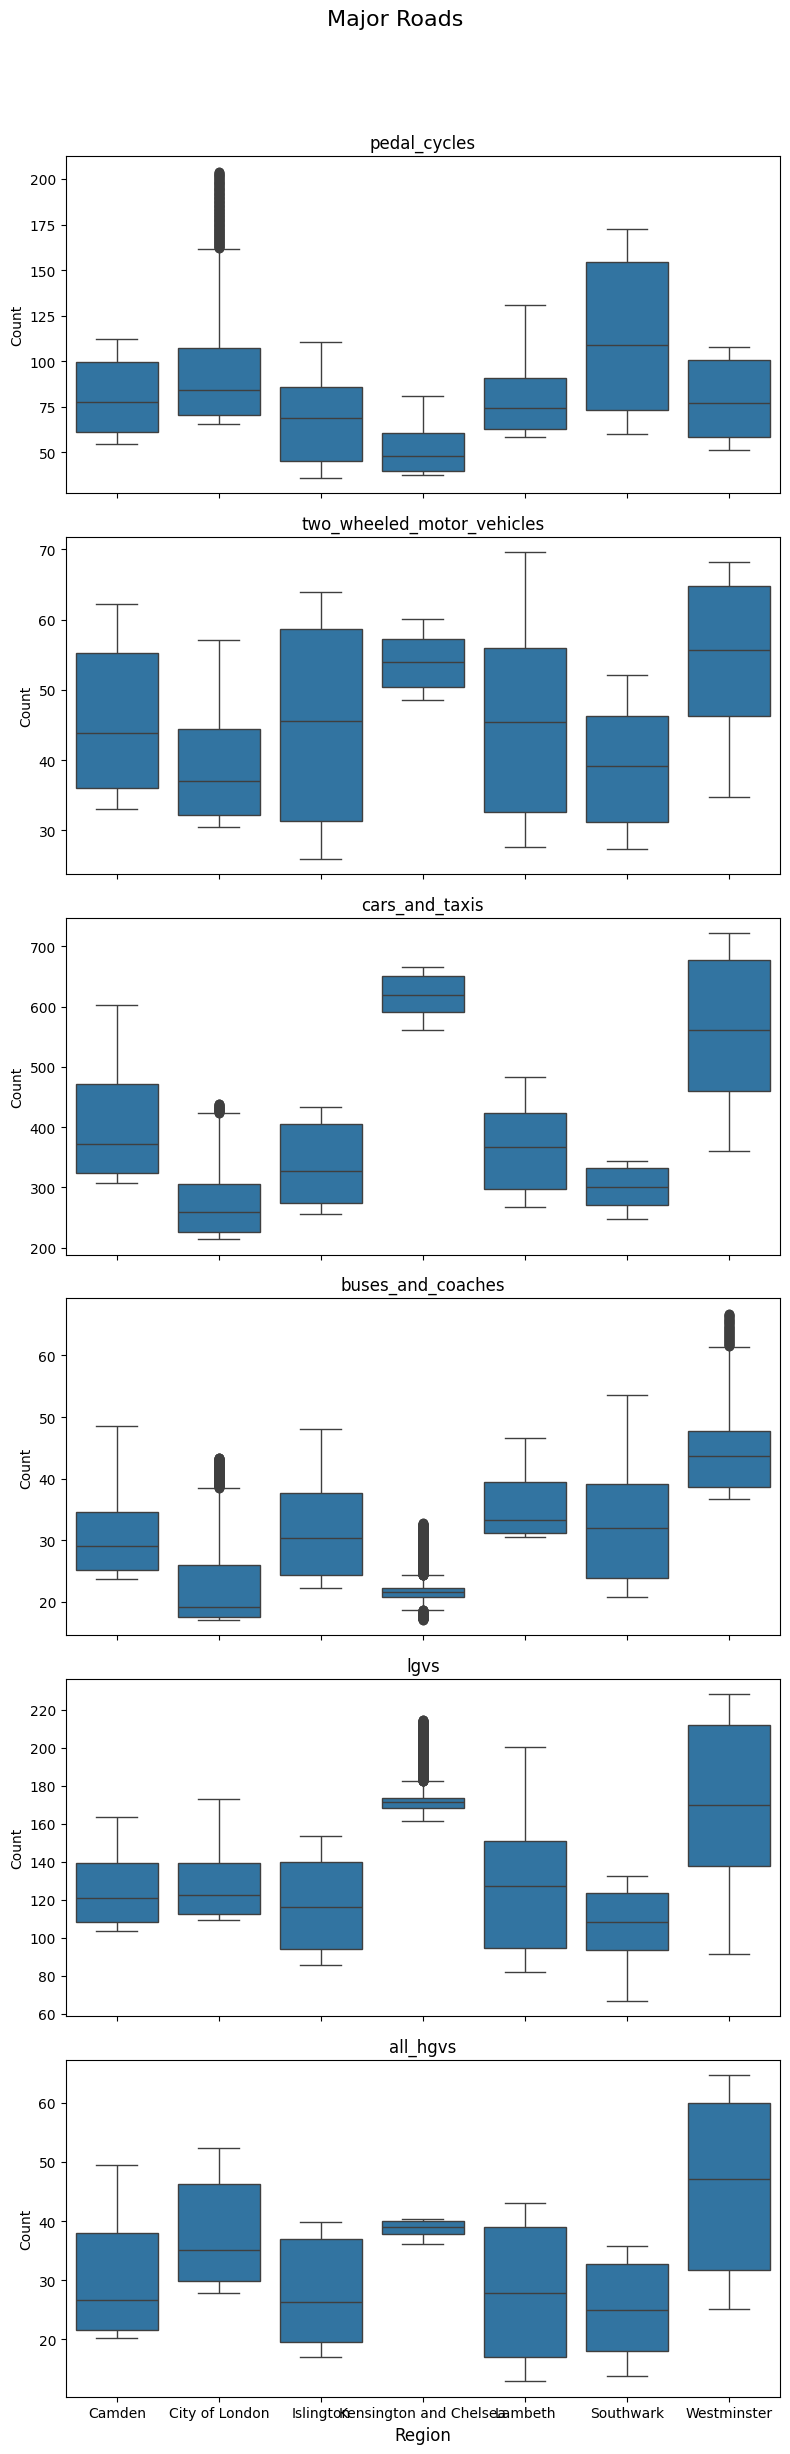

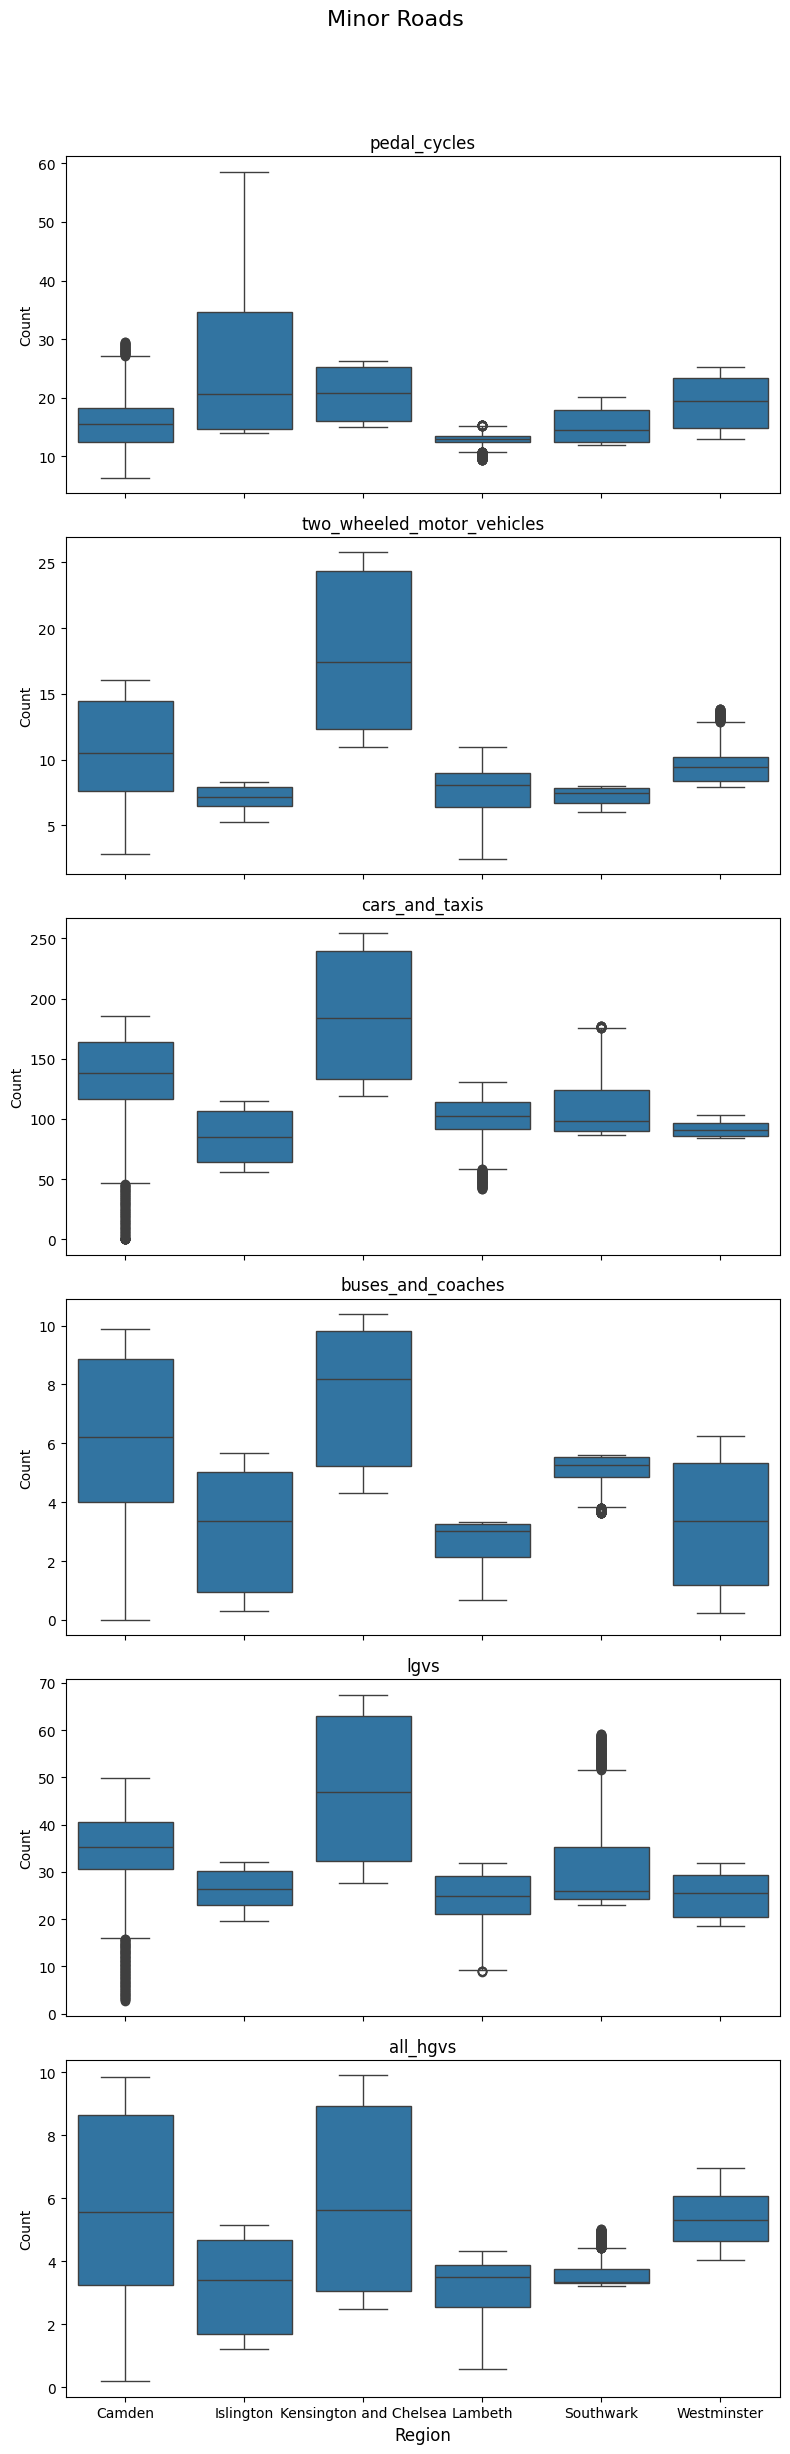

In [13]:

# Initialize an empty DataFrame to store all data
all_data = pd.DataFrame()

# Search for CSV files in the base folder that match the regions
for root, dirs, files in os.walk(base_folder):
    for file in files:
        if file.endswith('.csv') and any(region in file for region in regions):
            file_path = os.path.join(root, file)
            df = pd.read_csv(file_path)
            # Extract region from the file name
            for region in regions:
                if region in file:
                    df['region'] = region
                    break
            all_data = pd.concat([all_data, df], ignore_index=True)

# Check if 'region' column exists
if 'region' not in all_data.columns:
    raise ValueError("The 'region' column is missing from the data.")

# Filter data for Major and Minor roads
major_roads = all_data[all_data['road_type'] == 'Major']
minor_roads = all_data[all_data['road_type'] == 'Minor']

# Function to plot boxplots for a given road type
def plot_boxplots(data, road_type):
    fig, axes = plt.subplots(nrows=len(vehicle_types), ncols=1, figsize=(8, 25), sharex=True)
    fig.suptitle(f'{road_type} Roads', fontsize=16)
    
    for ax, vehicle_type in zip(axes, vehicle_types):
        sns.boxplot(x='region', y=vehicle_type, data=data, ax=ax)
        ax.set_title(vehicle_type)
        ax.set_xlabel('Region', fontsize=12)
        ax.set_ylabel('Count')
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Plot boxplots for Major roads
plot_boxplots(major_roads, 'Major')

# Plot boxplots for Minor roads
plot_boxplots(minor_roads, 'Minor')

# Time series